In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import  mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, max_error
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/home/pikeblessed/proyecto_phnan/deploy-project-datascience/data/df_processed.csv')
df.head(1)

,date,format,comments,likes,reach,engagement,saved,shares
0,2023-04-01,1,2,27,664,32,1,2


In [3]:
#define target feature
X = df.drop(['reach', 'date', 'engagement'], axis=1)
y = df['reach']

In [4]:
#split train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [5]:
#predict
model = Ridge().fit(X_train, y_train)
y_pred = model.predict(X_test)

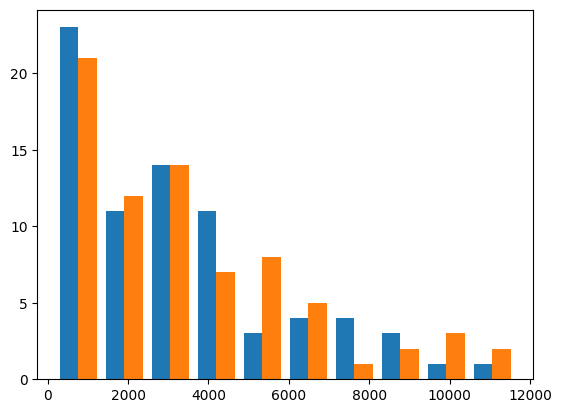

In [6]:
plt.hist([y_pred, y_test]);

In [7]:
#model evaluation
print('R2 score test: ', model.score(X_test, y_test))
print('R2 score train: ', model.score(X_train, y_train))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
print('M: ', max_error(y_test, y_pred))
print('RSS: ', mean_squared_error(y_test, y_pred)*len(y_pred))
print('RMSE: ', mean_squared_error(y_test, y_pred, squared=False))

R2 score test:  0.8820105758431669
R2 score train:  0.9064591663015616
MSE:  996485.1941824305
MAE:  660.8809866808606
MAPE:  0.31720334487015
M:  4407.234826040244
RSS:  74736389.56368229
RMSE:  998.2410501389083


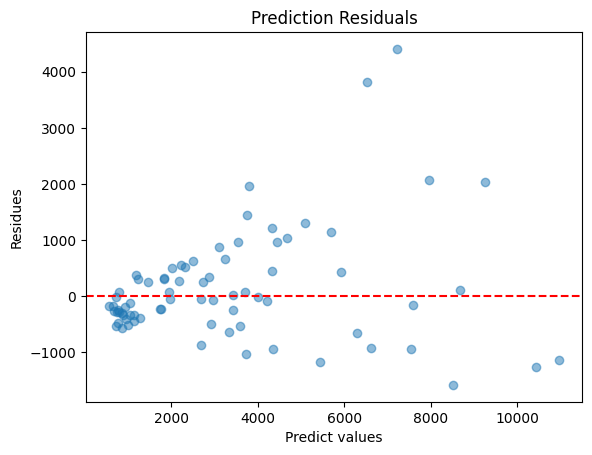

In [8]:
#prediction residuals
residuals = np.subtract(y_test, y_pred)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Prediction Residuals')
plt.xlabel('Predict values')
plt.ylabel('Residues')
plt.axhline(y=0, linestyle='--', color='r');